<a href="https://colab.research.google.com/github/PrachiJadhav12/Credit_Card_default_Prediction/blob/main/creditCopy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

from seaborn.rcmod import set_style
# Importing libraries

import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style= 'whitegrid', palette = 'mako')

import datetime as dt
from datetime import datetime

In [292]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, binarize
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [161]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [162]:
# Load Dataset
df_original = pd.read_csv('/content/drive/MyDrive/Data Set/default of credit card clients.csv', encoding= 'unicode_escape')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [163]:
df = df_original.copy()

### Dataset First View

In [164]:
# Dataset First Look
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [165]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

Since Coulmn names is not properly named.

In [166]:
df.columns = df.iloc[0]
df= df.drop(index=0)

After bringing columns names from first row.

In [167]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [168]:
# Dataset First Look after change
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [169]:
# Dataset Rows & Columns count
print('Row count is:', len(df.index))

Row count is: 30000


In [170]:
print('Row count is:', len(df.columns))

Row count is: 25


### Dataset Information

In [171]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

All columns in this dataset have a object type. So we will need to convert datatype of column.

In [172]:
#Converting datatype of column
List_dtype = list(df.columns)
List_dtype


['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [174]:
float_dtype_slice  = list(List_dtype[12:25])
float_dtype_slice

['BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [175]:
for col in [float_dtype_slice]:
  df[col] = df[col].astype('float')

In [176]:
Int_dtype_slice = list(List_dtype[0:12])

In [177]:
Int_dtype_slice

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

In [178]:
for col in [Int_dtype_slice]:
  df[col] = df[col].astype('int64')

In [179]:
#After changing dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

#### Duplicate Values

In [180]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In [181]:
df.duplicated().value_counts()

False    30000
dtype: int64

#### Missing Values/Null Values

In [182]:
# Missing Values/Null Values Count
df.isnull().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

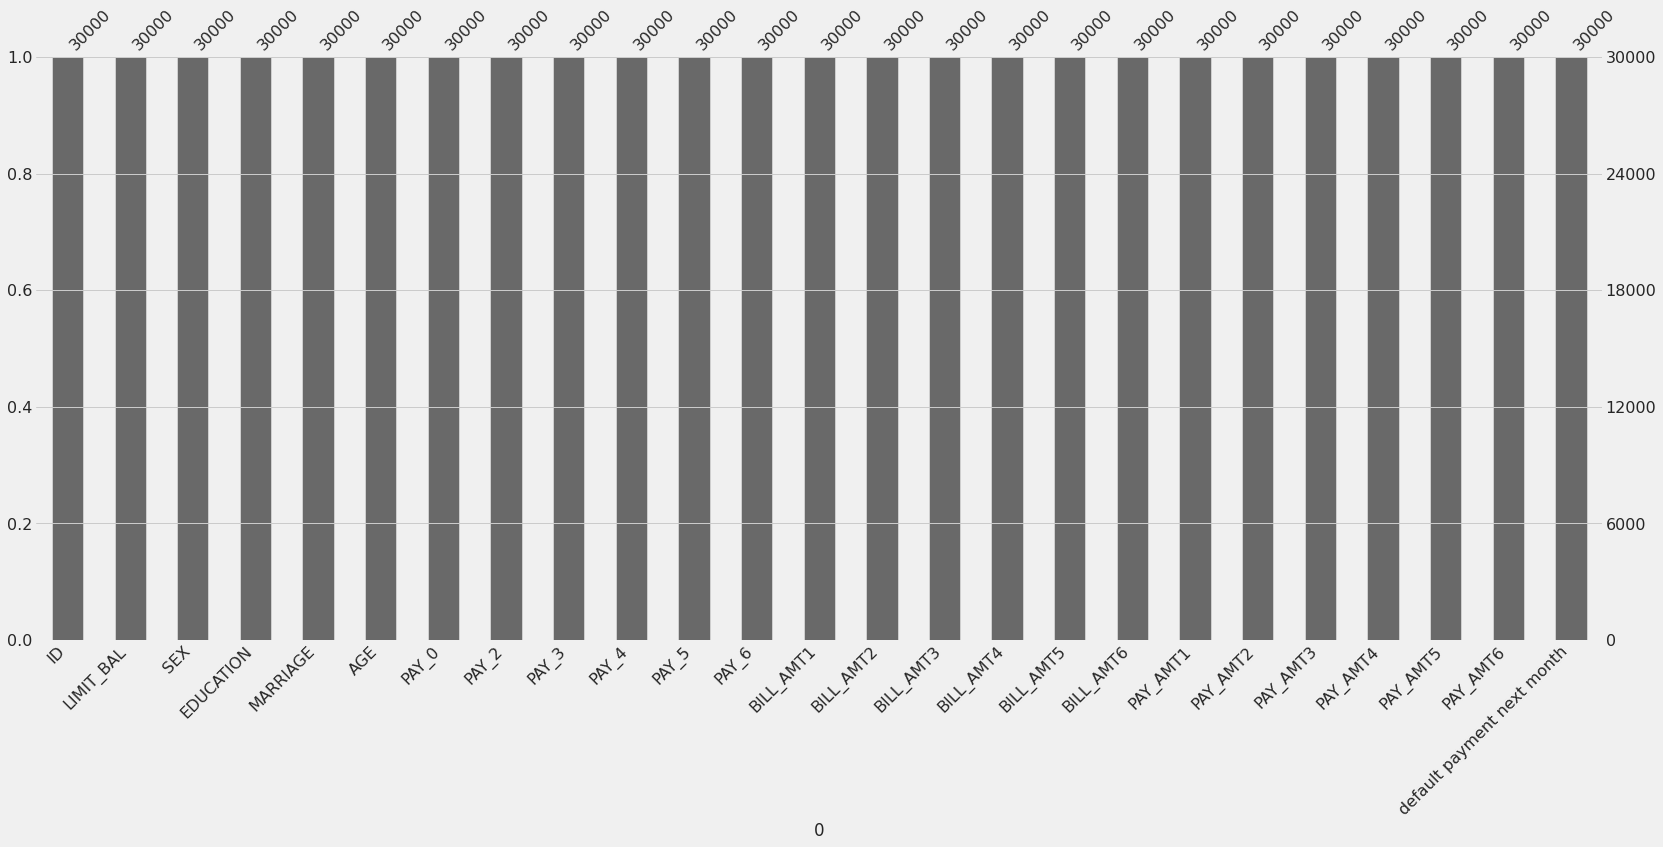

In [183]:
# Visualizing the missing values
import missingno as msno
msno.bar(df)

There is no missing values in dataset.



In [184]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,"30,000.0","30,000.0","30,000.0","30,000.0","30,000.0","30,000.0","30,000.0","30,000.0","30,000.0","30,000.0",...,"30,000.0","30,000.0","30,000.0","30,000.0","30,000.0","30,000.0","30,000.0","30,000.0","30,000.0","30,000.0"
mean,"15,000.5","167,484.32266666667",1.6037333333333332,1.8531333333333333,1.5518666666666667,35.4855,-0.0167,-0.13376666666666667,-0.1662,-0.22066666666666668,...,"43,262.94896666666","40,311.40096666667","38,871.7604","5,663.5805","5,921.1635","5,225.6815","4,826.076866666666","4,799.387633333334","5,215.502566666667",0.2212
std,"8,660.398374208891","129,747.66156720239",0.48912919609026045,0.7903486597207291,0.5219696006132486,9.217904068090188,1.1238015279973348,1.1971859730345533,1.1968675684465735,1.1691386224023375,...,"64,332.85613391631","60,797.15577026487","59,554.10753674573","16,563.280354025766","23,040.87040205724","17,606.961469803104","15,666.159744032007","15,278.305679144789","17,777.4657754353",0.41506180569093337
min,1.0,"10,000.0",1.0,0.0,0.0,21.0,-2.0,-2.0,-2.0,-2.0,...,"-170,000.0","-81,334.0","-339,603.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,"7,500.75","50,000.0",1.0,1.0,1.0,28.0,-1.0,-1.0,-1.0,-1.0,...,"2,326.75","1,763.0","1,256.0","1,000.0",833.0,390.0,296.0,252.5,117.75,0.0
50%,"15,000.5","140,000.0",2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,"19,052.0","18,104.5","17,071.0","2,100.0","2,009.0","1,800.0","1,500.0","1,500.0","1,500.0",0.0
75%,"22,500.25","240,000.0",2.0,2.0,2.0,41.0,0.0,0.0,0.0,0.0,...,"54,506.0","50,190.5","49,198.25","5,006.0","5,000.0","4,505.0","4,013.25","4,031.5","4,000.0",0.0
max,"30,000.0","1,000,000.0",2.0,6.0,3.0,79.0,8.0,8.0,8.0,8.0,...,"891,586.0","927,171.0","961,664.0","873,552.0","1,684,259.0","896,040.0","621,000.0","426,529.0","528,666.0",1.0


### What did you know about your dataset?

Answer Here:

1. There are 30000 distinct credit card clients.
2. The average value for the amount of credit card limit is 167484.32.
3. The standard deviation is unusually large,max value being 1000000.
4. Education Level is mostly graduate school and university.
5. Most of clients are either married or single.
6. Average age is 35.5 years, with a standard deviation of 9.2.
7. As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.219 means that there are 22.1% of credit card contracts that will default next month.

In [185]:
df['AGE'].describe()

count            30,000.0
mean              35.4855
std     9.217904068090188
min                  21.0
25%                  28.0
50%                  34.0
75%                  41.0
max                  79.0
Name: AGE, dtype: float64

## ***2. Understanding Your Variables***

In [186]:
# Dataset Columns
# Check the column names to identify the dependent and independent variables.
for column_name in df.columns:
    print(column_name)



ID
LIMIT_BAL
SEX
EDUCATION
MARRIAGE
AGE
PAY_0
PAY_2
PAY_3
PAY_4
PAY_5
PAY_6
BILL_AMT1
BILL_AMT2
BILL_AMT3
BILL_AMT4
BILL_AMT5
BILL_AMT6
PAY_AMT1
PAY_AMT2
PAY_AMT3
PAY_AMT4
PAY_AMT5
PAY_AMT6
default payment next month


In [ ]:
 # Dataset Describe

### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [187]:
df_unique = list(df.columns)
df_unique

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [188]:
type(df_unique)

list

In [ ]:
for i in df_unique:
  print("Unique value for column",i,"is:",df[i].unique(),\n)

SyntaxError: ignored

In [189]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  ID is 30000 .
No. of unique values in  LIMIT_BAL is 81 .
No. of unique values in  SEX is 2 .
No. of unique values in  EDUCATION is 7 .
No. of unique values in  MARRIAGE is 4 .
No. of unique values in  AGE is 56 .
No. of unique values in  PAY_0 is 11 .
No. of unique values in  PAY_2 is 11 .
No. of unique values in  PAY_3 is 11 .
No. of unique values in  PAY_4 is 11 .
No. of unique values in  PAY_5 is 10 .
No. of unique values in  PAY_6 is 10 .
No. of unique values in  BILL_AMT1 is 22723 .
No. of unique values in  BILL_AMT2 is 22346 .
No. of unique values in  BILL_AMT3 is 22026 .
No. of unique values in  BILL_AMT4 is 21548 .
No. of unique values in  BILL_AMT5 is 21010 .
No. of unique values in  BILL_AMT6 is 20604 .
No. of unique values in  PAY_AMT1 is 7943 .
No. of unique values in  PAY_AMT2 is 7899 .
No. of unique values in  PAY_AMT3 is 7518 .
No. of unique values in  PAY_AMT4 is 6937 .
No. of unique values in  PAY_AMT5 is 6897 .
No. of unique values in  PAY_AMT

## 3. ***Data Wrangling***

### Data Wrangling Code

Dependent Variable:

In [190]:
# Write your code to make your dataset analysis ready.
#renaming for better convenience
df['IsDefaulter'] = df['default payment next month']
df.drop('default payment next month',axis = 1)



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter
1,1,20000,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,2,120000,2,2,2,26,-1,2,0,0,...,"3,272.0","3,455.0","3,261.0",0.0,"1,000.0","1,000.0","1,000.0",0.0,"2,000.0",1.0
3,3,90000,2,2,2,34,0,0,0,0,...,"14,331.0","14,948.0","15,549.0","1,518.0","1,500.0","1,000.0","1,000.0","1,000.0","5,000.0",0.0
4,4,50000,2,2,1,37,0,0,0,0,...,"28,314.0","28,959.0","29,547.0","2,000.0","2,019.0","1,200.0","1,100.0","1,069.0","1,000.0",0.0
5,5,50000,1,2,1,57,-1,0,-1,0,...,"20,940.0","19,146.0","19,131.0","2,000.0","36,681.0","10,000.0","9,000.0",689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,"88,004.0","31,237.0","15,980.0","8,500.0","20,000.0","5,003.0","3,047.0","5,000.0","1,000.0",0.0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,"8,979.0","5,190.0",0.0,"1,837.0","3,526.0","8,998.0",129.0,0.0,0.0,0.0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,"20,878.0","20,582.0","19,357.0",0.0,0.0,"22,000.0","4,200.0","2,000.0","3,100.0",1.0
29999,29999,80000,1,3,1,41,1,-1,0,0,...,"52,774.0","11,855.0","48,944.0","85,900.0","3,409.0","1,178.0","1,926.0","52,964.0","1,804.0",1.0


In [191]:
df['IsDefaulter'].value_counts()

0.0    23364
1.0     6636
Name: IsDefaulter, dtype: int64

From above graph we can see that both classes are not in proportion and we have imbalanced dataset.

**Independent Variable:**


**Categorical Features:**

**SEX**


*  1- Male
*  2- Female



In [192]:
#1. SEX
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

**Education**:
1= graduate school; 2= university; 3= high school; 4= others

In [193]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

From dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

In [194]:
fil = (df['EDUCATION']==5)| (df['EDUCATION']==6)| (df['EDUCATION']==0)
df.loc[fil,'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

For plotting categorical features:

In [195]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [196]:
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['IsDefaulter']

In [198]:
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

**Limit Balance:**

In [200]:
df['LIMIT_BAL'].max()

1000000

In [199]:
df['LIMIT_BAL'].min()

10000

In [201]:
df['LIMIT_BAL'].describe()

count              30,000.0
mean    167,484.32266666667
std     129,747.66156720239
min                10,000.0
25%                50,000.0
50%               140,000.0
75%               240,000.0
max             1,000,000.0
Name: LIMIT_BAL, dtype: float64

In [202]:
#renaming columns
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)

In [203]:
#renaming columns
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)

In [204]:
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [205]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default payment next month,IsDefaulter
1,1,20000,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0,1.0
2,2,120000,2,2,2,26,-1,2,0,0,...,"3,455.0","3,261.0",0.0,"1,000.0","1,000.0","1,000.0",0.0,"2,000.0",1.0,1.0
3,3,90000,2,2,2,34,0,0,0,0,...,"14,948.0","15,549.0","1,518.0","1,500.0","1,000.0","1,000.0","1,000.0","5,000.0",0.0,0.0
4,4,50000,2,2,1,37,0,0,0,0,...,"28,959.0","29,547.0","2,000.0","2,019.0","1,200.0","1,100.0","1,069.0","1,000.0",0.0,0.0
5,5,50000,1,2,1,57,-1,0,-1,0,...,"19,146.0","19,131.0","2,000.0","36,681.0","10,000.0","9,000.0",689.0,679.0,0.0,0.0


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Figure size 720x360 with 0 Axes>

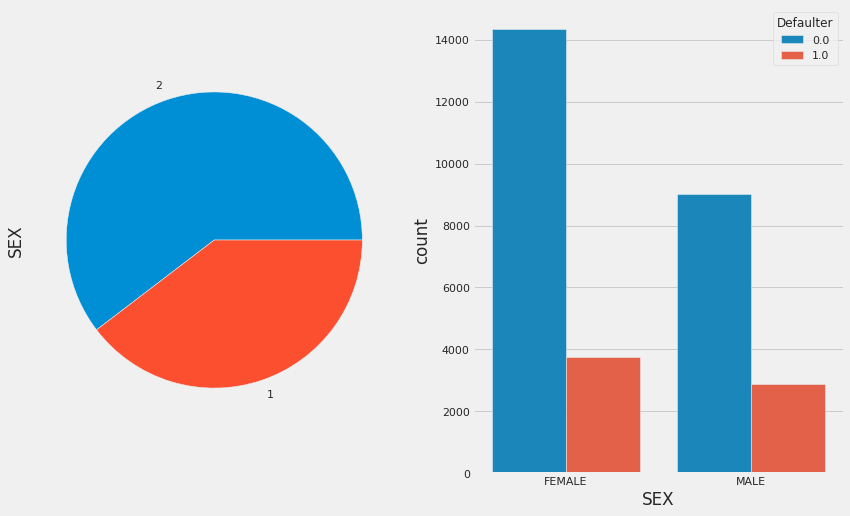

<Figure size 720x360 with 0 Axes>

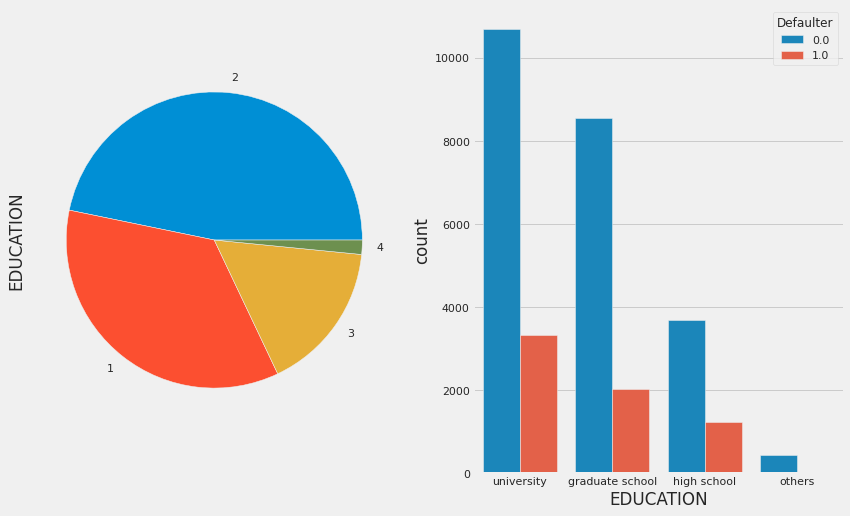

<Figure size 720x360 with 0 Axes>

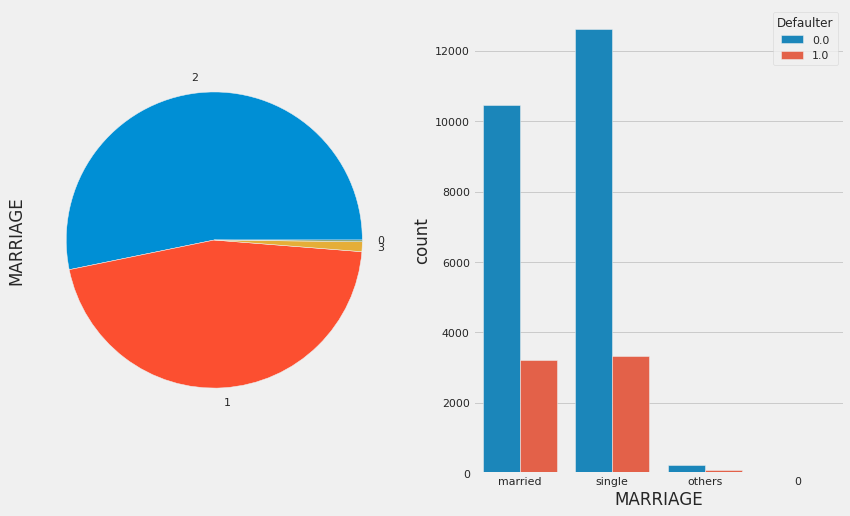

In [206]:
# Chart - 1 visualization code
#plotting categorical features
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?
- There are more females credit card holder so no. of defaulter have high proportion of females.
- No.of defaulters have a higher proportion of educated people (graduate school and university)
- no.of defaulters have a higher proportion of singles.

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

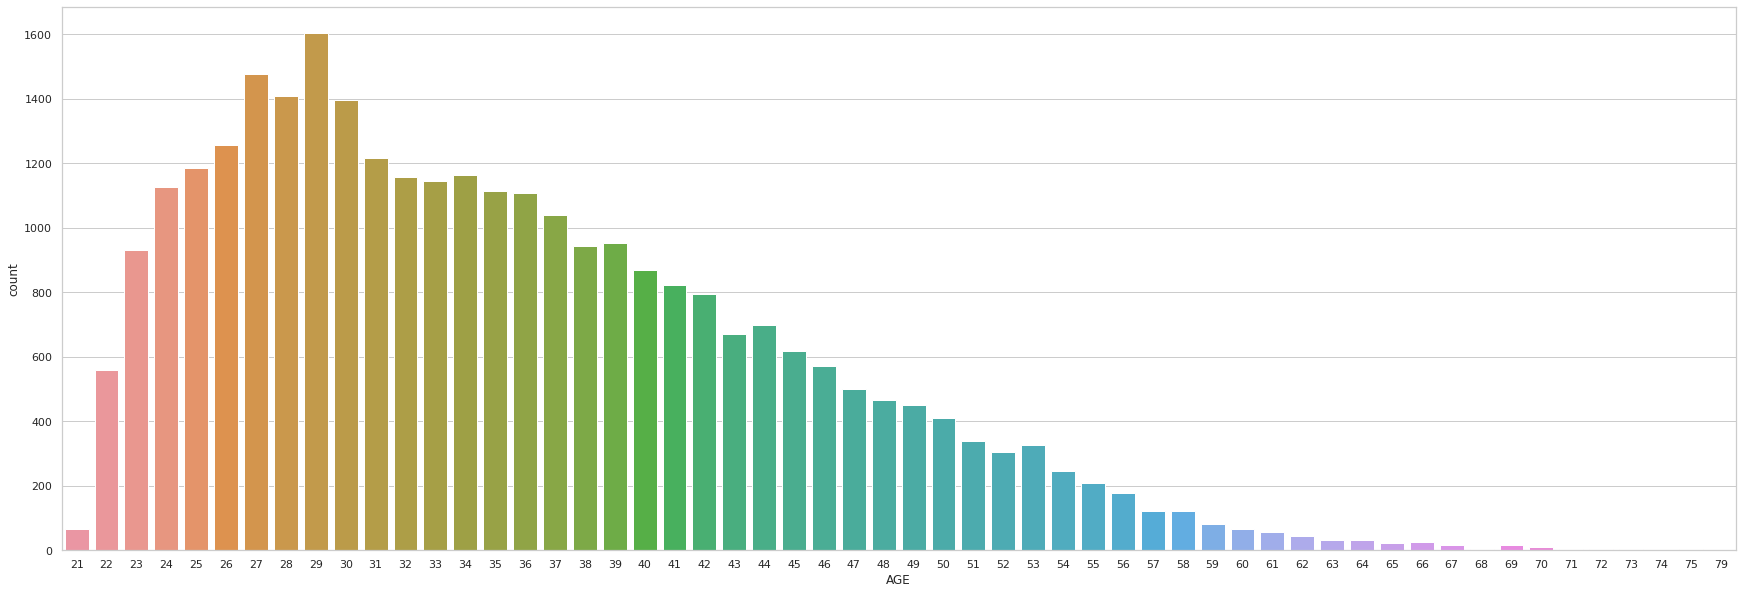

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize = (30,10))
sns.countplot(df['AGE'])

(array([5.127e+03, 8.261e+03, 6.514e+03, 4.812e+03, 2.606e+03, 1.836e+03,
        6.280e+02, 1.710e+02, 4.000e+01, 5.000e+00]),
 array([21. , 26.8, 32.6, 38.4, 44.2, 50. , 55.8, 61.6, 67.4, 73.2, 79. ]),
 <a list of 10 Patch objects>)

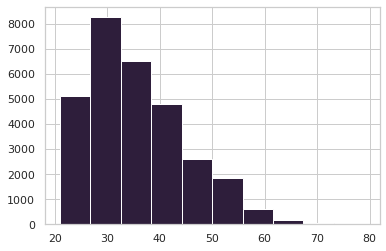

In [ ]:
plt.hist(df['AGE'],bins=10)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

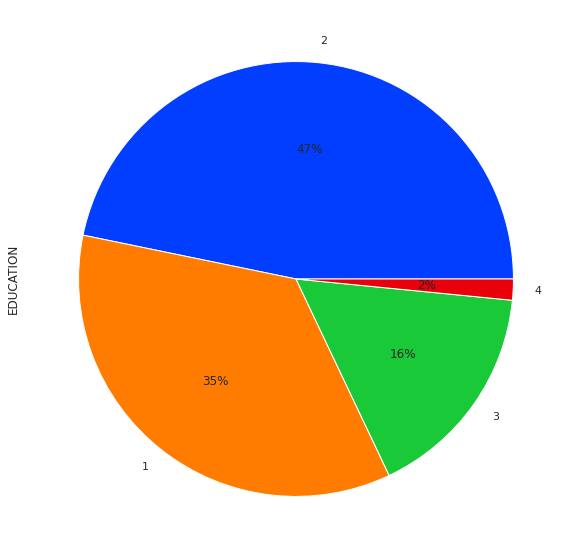

In [ ]:
# Chart - 3 visualization code
data = df['EDUCATION']

palette_color = sns.color_palette('bright')
explode = [0, 0.1, 0, 0, 0]
data.value_counts().plot(kind='pie',colors=palette_color,autopct='%.0f%%',figsize = (30,10))


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

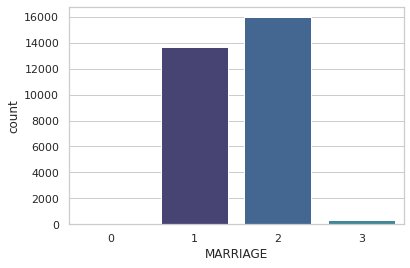

In [ ]:
# Chart - 4 visualization code
sns.countplot(df['MARRIAGE'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

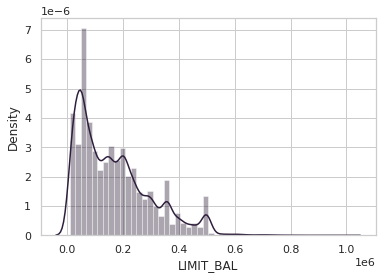

In [ ]:
# Chart - 5 visualization code
sns.distplot(df['LIMIT_BAL'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

Text(0.5, 1.0, 'SEX v/s COUNT')

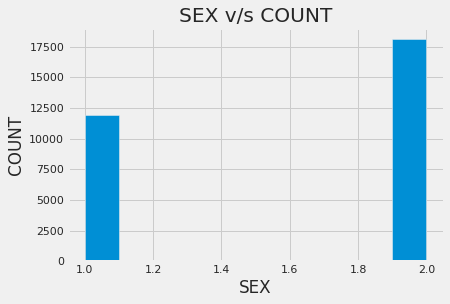

In [ ]:
# Chart - 6 visualization code
plt.style.use('fivethirtyeight')
df['SEX'].hist()
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.title('SEX v/s COUNT')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?
**Number of Male credit holder is less than Female.**

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

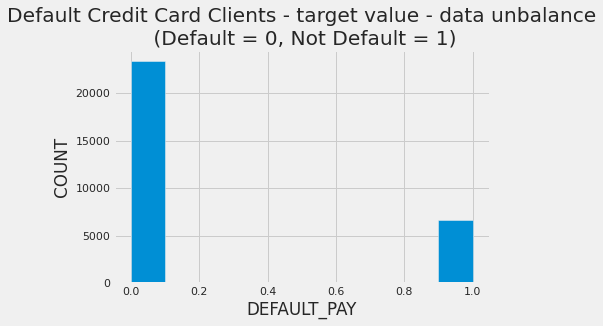

In [ ]:
# Chart - 7 visualization code
plt.style.use('fivethirtyeight')
df['IsDefaulter'].hist()
plt.xlabel('DEFAULT_PAY')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

**Percentage of Defaulters are smaller than the Non Defaulters in the given dataset.**

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here:


#### Chart - 8

Text(0.5, 1.0, 'EDUCATION v/s COUNT')

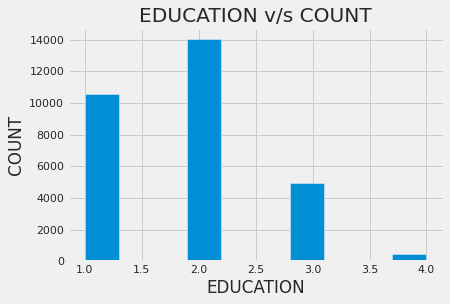

In [ ]:
# Chart - 8 visualization code
plt.style.use('fivethirtyeight')
df['EDUCATION'].hist()
plt.xlabel('EDUCATION')
plt.ylabel('COUNT')
plt.title('EDUCATION v/s COUNT')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

Text(0.5, 1.0, 'MARRIAGE v/s COUNT')

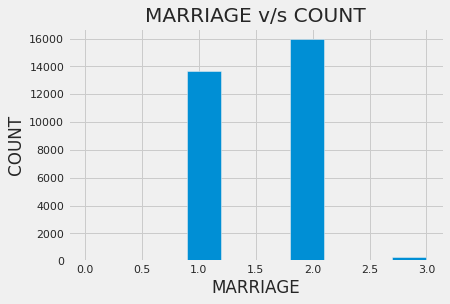

In [ ]:
# Chart - 9 visualization code
plt.style.use('fivethirtyeight')
df['MARRIAGE'].hist()
plt.xlabel('MARRIAGE')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?
**More number of credit cards holder are Married**

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
PAY_VAR = ['PAY_SEPT','PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']

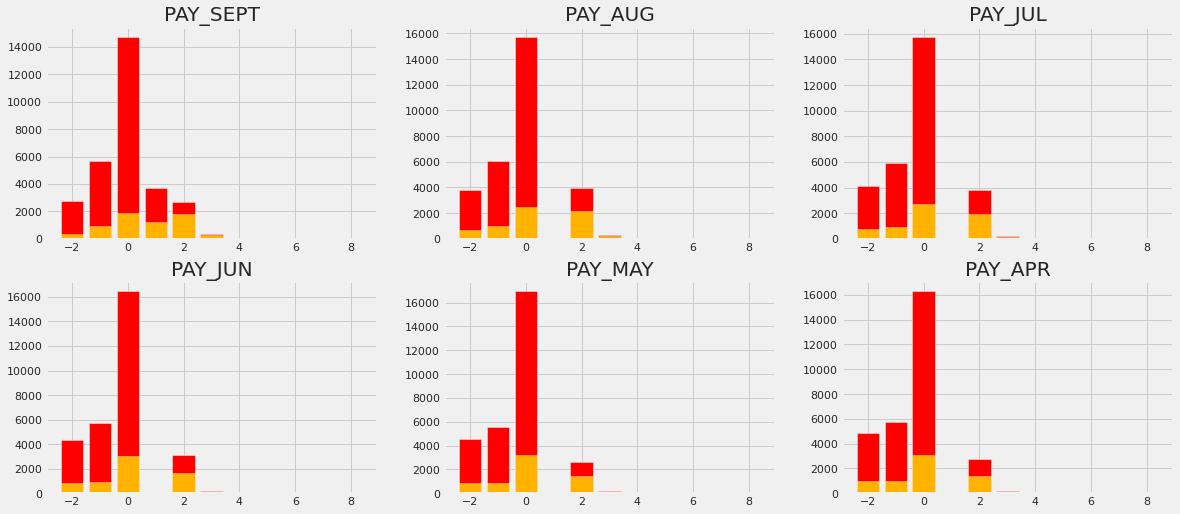

In [ ]:
pay_status_columns = PAY_VAR
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)



for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['IsDefaulter']==1.0)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
   


    
plt.show()


The above figure shows bar plot for each month payment status which show the count of defaulters and non-defaulter.

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'default payment next month', 'IsDefaulter'],
      dtype='object', name=0)

In [ ]:
# Chart - 11 visualization code
BILL_VAR = ['BILL_AMT_SEPT','BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY','BILL_AMT_APR']

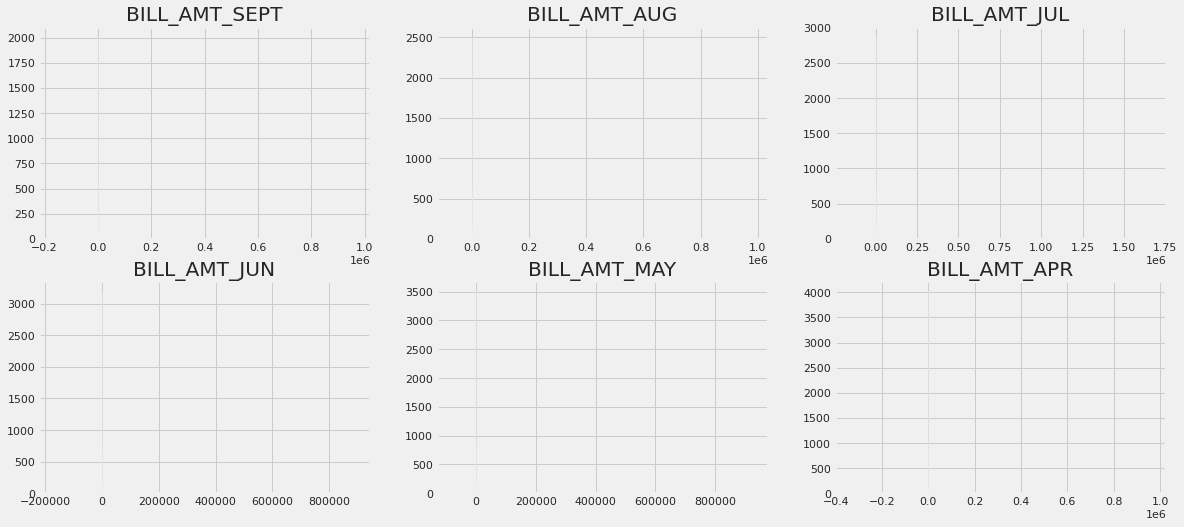

In [ ]:
pay_status_columns = BILL_VAR 
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)



for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['IsDefaulter']==1.0)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
   


    
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here:
The above histogram shows the distribution of Bill amount generated for each month explicitly for defaulters and non-defaulters.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

In [ ]:
PAY_AMT_VAR = ['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL','PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']

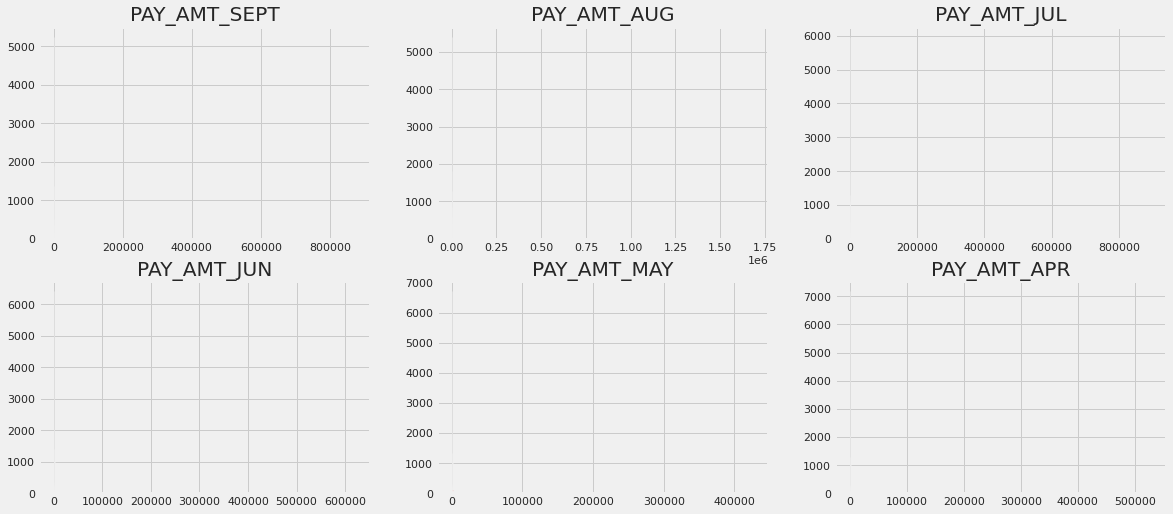

In [ ]:
pay_status_columns = PAY_AMT_VAR 
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)



for i in range(len(pay_status_columns)):
    row,col = int(i/3),i%3

    d = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['IsDefaulter']==1.0)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='red')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])
   


    
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The above histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters.

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

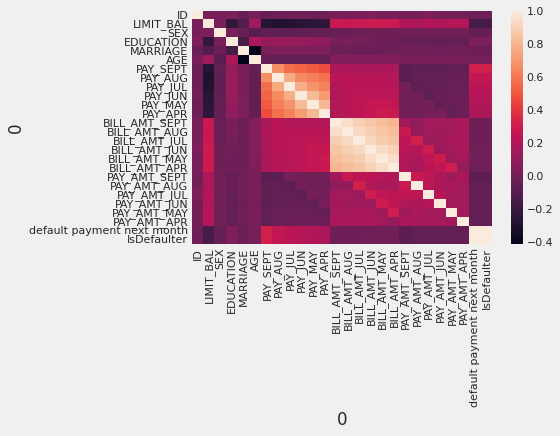

In [ ]:
# Correlation Heatmap visualization code
corr = df.corr()

# plot the heatmap
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns, annot_kws={'size': 30})

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

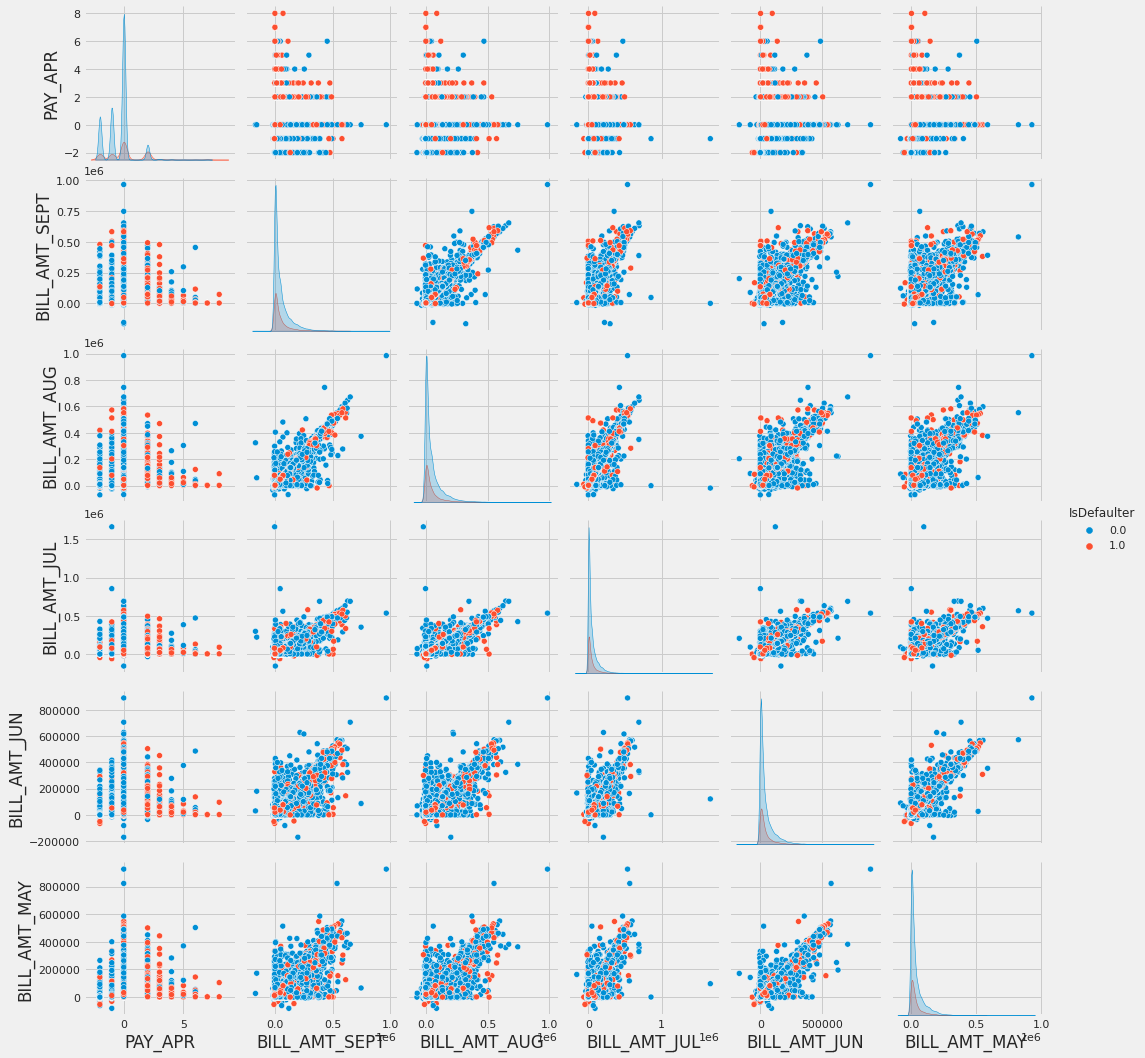

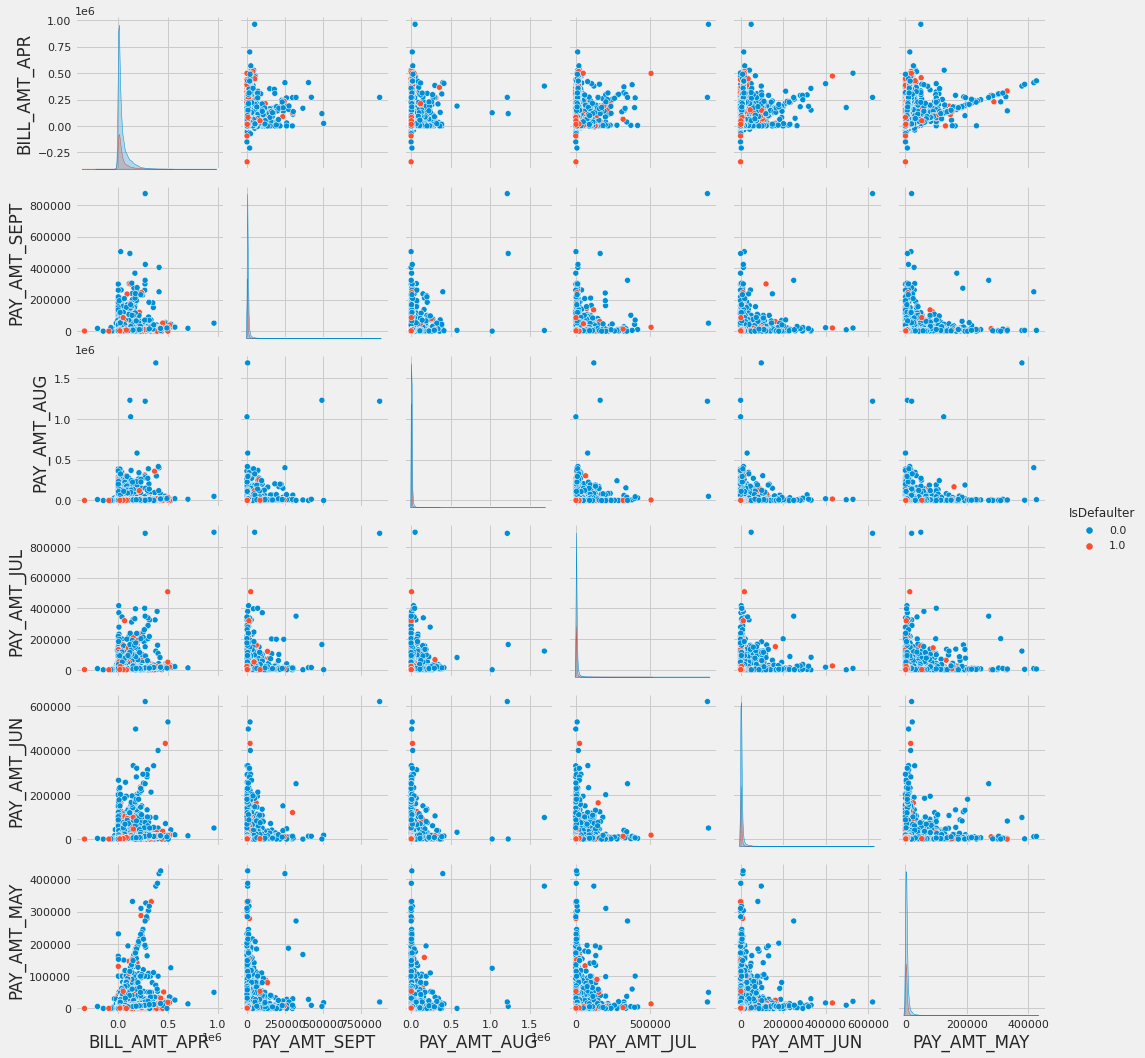

In [ ]:
# Pair Plot visualization code
# plot columns with similar names to check the correlation

sns.pairplot(df, vars=df.columns[11:17], kind='scatter',hue= 'IsDefaulter')
sns.pairplot(df, vars=df.columns[17:23],hue = 'IsDefaulter')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [207]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum().sum() # Number of NULLs in the whole Data Frame

0

#### What all missing value imputation techniques have you used and why did you use those techniques?

**No such techniques used as there is no missing values available.**

Answer Here.

### 2. Handling Outliers

In [208]:
# Handling Outliers & Outlier treatments
pd.options.display.float_format = '{:,}'.format

In [209]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
ID,"30,000.0","15,000.5","8,660.398374208891",1.0,"7,500.75","15,000.5","22,500.25","30,000.0"
LIMIT_BAL,"30,000.0","167,484.32266666667","129,747.66156720239","10,000.0","50,000.0","140,000.0","240,000.0","1,000,000.0"
SEX,"30,000.0",1.6037333333333332,0.48912919609026045,1.0,1.0,2.0,2.0,2.0
EDUCATION,"30,000.0",1.8422666666666667,0.7444944624524593,1.0,1.0,2.0,2.0,4.0
MARRIAGE,"30,000.0",1.5518666666666667,0.5219696006132486,0.0,1.0,2.0,2.0,3.0
AGE,"30,000.0",35.4855,9.217904068090188,21.0,28.0,34.0,41.0,79.0
PAY_SEPT,"30,000.0",-0.0167,1.1238015279973348,-2.0,-1.0,0.0,0.0,8.0
PAY_AUG,"30,000.0",-0.13376666666666667,1.1971859730345533,-2.0,-1.0,0.0,0.0,8.0
PAY_JUL,"30,000.0",-0.1662,1.1968675684465735,-2.0,-1.0,0.0,0.0,8.0


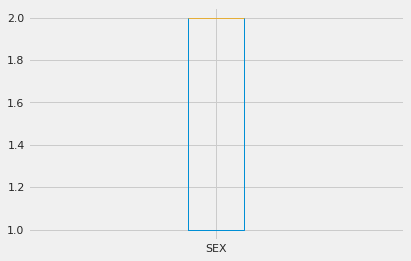

In [210]:
df[['SEX']].plot(kind='box')

**No outliers for Sex because the values in this dataset only take on 2 values.**

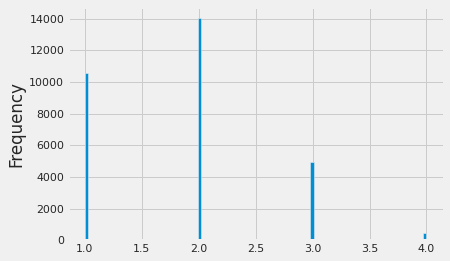

In [211]:
df['EDUCATION'].plot(kind='hist', bins=100)

**The vast majority of values for educaiton are 1 (graduate school), 2 (university), or 3 (high school) with a few values for 4 which represent "others".. These are outliers but not unexpected. There are also curiously values of 0 for Education which should not be possible.**

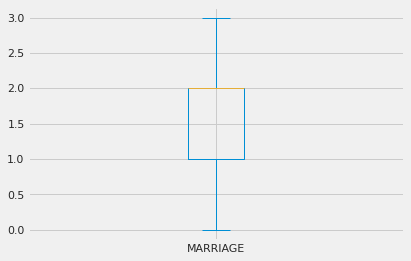

In [212]:
df[['MARRIAGE']].plot(kind='box')

In [213]:
df['MARRIAGE'].describe()

count             30,000.0
mean    1.5518666666666667
std     0.5219696006132486
min                    0.0
25%                    1.0
50%                    2.0
75%                    2.0
max                    3.0
Name: MARRIAGE, dtype: float64

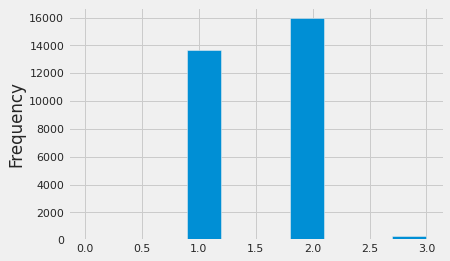

In [214]:
df['MARRIAGE'].plot(kind='hist')

In [215]:
df[df['MARRIAGE'] == 0].shape

(54, 26)

For marriage, the vast majority of values are either 1 (married) or 2 (single) as would be expected. A few values are equal to 3 ("Others") and again, curiously, some values (54 to be exact) are equal to 0 which should not be possible.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

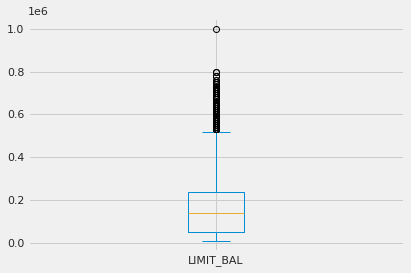

In [216]:
df['LIMIT_BAL'].plot(kind='box')

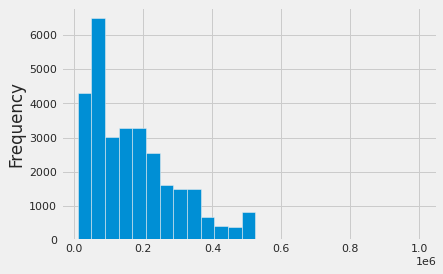

In [217]:
df['LIMIT_BAL'].plot(kind='hist', bins=25)

In [218]:
df['LIMIT_BAL'].describe()

count              30,000.0
mean    167,484.32266666667
std     129,747.66156720239
min                10,000.0
25%                50,000.0
50%               140,000.0
75%               240,000.0
max             1,000,000.0
Name: LIMIT_BAL, dtype: float64

In [219]:
df['LIMIT_BAL'].max()

1000000

In [221]:
df[df['LIMIT_BAL'] < 200000].shape

(18850, 26)

In [220]:
df.shape

(30000, 26)

Most of the values (18850) are clustered below 200,000 of given credit. Some outliers do appear above the maximum non-outlier value of 525,000 where we are using the definition of an outlier being any value

a) greater than the Q3 value + 1.5*(the interquartile range)
b) any value less than Q1 - 1.5*(the interquartile range)

These values make perfect sense, so there is no need to get rid of them.

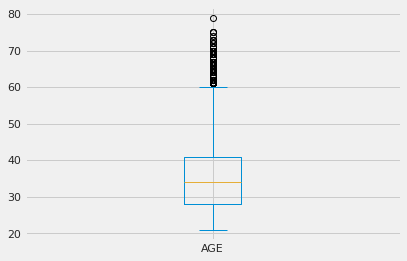

In [222]:
df['AGE'].plot(kind='box')

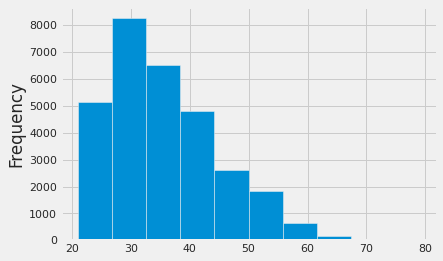

In [223]:
df['AGE'].plot(kind='hist', bins=10)

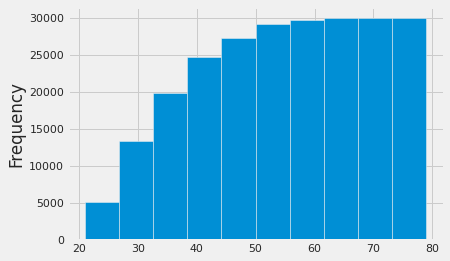

In [224]:
df['AGE'].plot(kind='hist', bins=10, cumulative=True)

In [225]:
df['AGE'].describe()

count            30,000.0
mean              35.4855
std     9.217904068090188
min                  21.0
25%                  28.0
50%                  34.0
75%                  41.0
max                  79.0
Name: AGE, dtype: float64

In [226]:
df[df['AGE'] >= 60.5].shape

(272, 26)

In [227]:
272/30000

0.009066666666666667

**We see that the majority (75% in this case) of the values fall between 21 and 41. Almost 1% of the values in this dataset can be classified as outliers by Age since they have ages greater than 60.5 years. These older ages make sense though and do not require any special handling.**

**Repayment Status Columns**

In [228]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'default payment next month', 'IsDefaulter'],
      dtype='object', name=0)

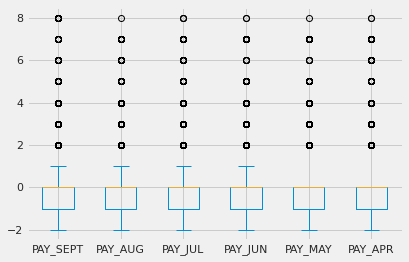

In [229]:
df[['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']].plot(kind='box')

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_SEPT                    30000 non-null  int64  
 7   PAY_AUG                     30000 non-null  int64  
 8   PAY_JUL                     30000 non-null  int64  
 9   PAY_JUN                     30000 non-null  int64  
 10  PAY_MAY                     30000 non-null  int64  
 11  PAY_APR                     30000 non-null  int64  
 12  BILL_AMT_SEPT               30000 non-null  float64
 13  BILL_AMT_AUG                300

In [231]:
df[['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']].describe()

,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR
count,"30,000.0","30,000.0","30,000.0","30,000.0","30,000.0","30,000.0"
mean,-0.0167,-0.13376666666666667,-0.1662,-0.22066666666666668,-0.2662,-0.2911
std,1.1238015279973348,1.1971859730345533,1.1968675684465735,1.1691386224023375,1.1331874060027483,1.1499876256079027
min,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,8.0,8.0,8.0,8.0,8.0,8.0


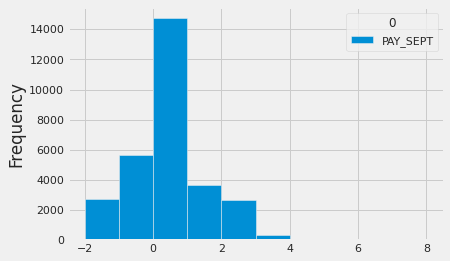

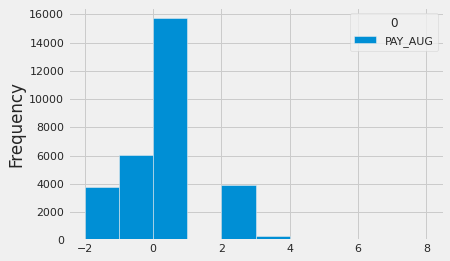

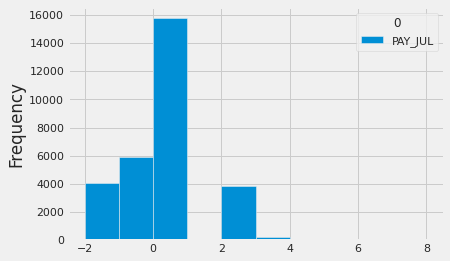

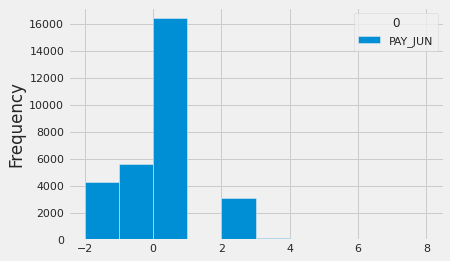

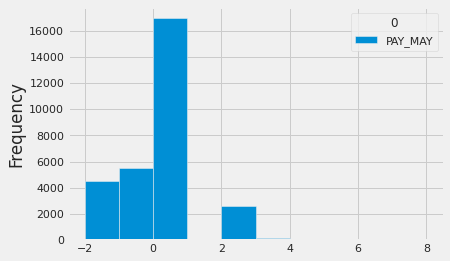

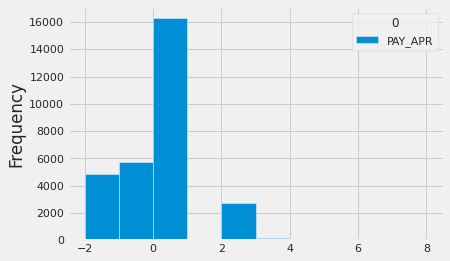

In [232]:
df[['PAY_SEPT']].plot(kind='hist')
df[['PAY_AUG']].plot(kind='hist')
df[['PAY_JUL']].plot(kind='hist')
df[['PAY_JUN']].plot(kind='hist')
df[['PAY_MAY']].plot(kind='hist')
df[['PAY_APR']].plot(kind='hist')

**What is curious is that most of the values for each column are 0 or -2 which should not be supported values, according to the online dataset descriptions. Other than that, all other values are supported, although it seems like the values are shifted down by 1 since the max is 9 and the dataset description says it should be 8. All values greater than or equal to 2 are considered outliers and since around 10% of rows have values greater than or equal to 2, about 10% of the dataset is considered to be outliers. These values make sense though and should be maintained.**

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_SEPT                    30000 non-null  int64  
 7   PAY_AUG                     30000 non-null  int64  
 8   PAY_JUL                     30000 non-null  int64  
 9   PAY_JUN                     30000 non-null  int64  
 10  PAY_MAY                     30000 non-null  int64  
 11  PAY_APR                     30000 non-null  int64  
 12  BILL_AMT_SEPT               30000 non-null  float64
 13  BILL_AMT_AUG                300

In [137]:

df['BILL_AMT_AUG'].plot(kind='hist')

TypeError: ignored

### 3. Categorical Encoding

In [253]:
# Encode your categorical columns
df_fr = pd.get_dummies(df_fr,columns=['EDUCATION','MARRIAGE'])

NameError: ignored

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [254]:
df_fr = balance_df.copy()

In [255]:
df_fr['Payement_Value'] = df_fr['PAY_SEPT'] + df_fr['PAY_AUG'] + df_fr['PAY_JUL'] + df_fr['PAY_JUN'] + df_fr['PAY_MAY'] + df_fr['PAY_APR']

In [256]:
df_fr.groupby('IsDefaulter')['Payement_Value'].mean()

IsDefaulter
0.0   -1.980140386920048
1.0   1.6332819722650231
Name: Payement_Value, dtype: float64

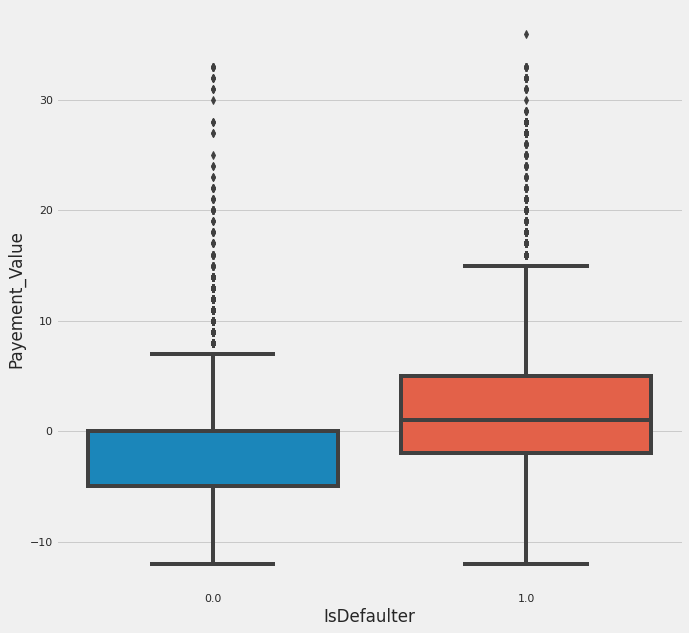

In [257]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_fr, x = 'IsDefaulter', y = 'Payement_Value' )

In [258]:
df_fr['Dues'] = (df_fr['BILL_AMT_APR']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUN']+df_fr['BILL_AMT_JUL']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APR']+df_fr['PAY_AMT_MAY']+df_fr['PAY_AMT_JUN']+df_fr['PAY_AMT_JUL']+df_fr['PAY_AMT_AUG']+df_fr['PAY_AMT_SEPT'])

In [259]:
df_fr.groupby('IsDefaulter')['Dues'].mean()

IsDefaulter
0.0   187,742.05153227187
1.0   195,808.82681417483
Name: Dues, dtype: float64

In [260]:
df_fr['EDUCATION'].unique()

array([2, 1, 3, 4])

In [261]:
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 6, 4, df_fr['EDUCATION'])
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 0, 4, df_fr['EDUCATION'])

In [262]:
df_fr['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [263]:
df_fr['MARRIAGE']=np.where(df_fr['MARRIAGE'] == 0, 3, df_fr['MARRIAGE'])

In [264]:
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [265]:
df_fr.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default payment next month,IsDefaulter,Payement_Value,Dues
0,1,20000,FEMALE,university,married,0,2,2,-1,-1,...,0.0,689.0,0.0,0.0,0.0,0.0,1.0,1.0,-2,"3,913.0"
1,2,120000,FEMALE,university,single,0,-1,2,0,0,...,0.0,"1,000.0","1,000.0","1,000.0",0.0,"2,000.0",1.0,1.0,3,"10,352.0"
2,3,90000,FEMALE,university,single,1,0,0,0,0,...,"1,518.0","1,500.0","1,000.0","1,000.0","1,000.0","5,000.0",0.0,0.0,0,"76,608.0"
3,4,50000,FEMALE,university,married,1,0,0,0,0,...,"2,000.0","2,019.0","1,200.0","1,100.0","1,069.0","1,000.0",0.0,0.0,0,"174,713.0"
4,5,50000,MALE,university,married,3,-1,0,-1,0,...,"2,000.0","36,681.0","10,000.0","9,000.0",689.0,679.0,0.0,0.0,-2,"44,620.0"


#### 2. Feature Selection

In [242]:
# Select your features wisely to avoid overfitting
# Define predictor variables and target variable
X = df.drop(columns=['ID','IsDefaulter'])
y = df['IsDefaulter']

# Save all feature names as list
feature_cols = X.columns.tolist() 

# Extract numerical columns and save as a list for rescaling
X_num = X.drop(columns=['SEX', 'EDUCATION', 'MARRIAGE', 'AGE'])
num_cols = X_num.columns.tolist() 

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 3. Categorical Encoding

In [266]:
df_fr = pd.get_dummies(df_fr,columns=['EDUCATION','MARRIAGE'])

In [267]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,IsDefaulter,Payement_Value,Dues,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,20000,FEMALE,0,2,2,-1,-1,-2,-2,...,1.0,-2,"3,913.0",0,0,0,1,1,0,0
1,2,120000,FEMALE,0,-1,2,0,0,0,2,...,1.0,3,"10,352.0",0,0,0,1,0,0,1
2,3,90000,FEMALE,1,0,0,0,0,0,0,...,0.0,0,"76,608.0",0,0,0,1,0,0,1
3,4,50000,FEMALE,1,0,0,0,0,0,0,...,0.0,0,"174,713.0",0,0,0,1,1,0,0
4,5,50000,MALE,3,-1,0,-1,0,0,0,...,0.0,-2,"44,620.0",0,0,0,1,1,0,0


In [268]:
df_fr.drop(['EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)

In [269]:
df_fr = pd.get_dummies(df_fr, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [270]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,FEMALE,0,"3,913.0","3,102.0",689.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,FEMALE,0,"2,682.0","1,725.0","2,682.0","3,272.0","3,455.0","3,261.0",...,0,0,0,1,0,0,0,0,0,0
2,3,90000,FEMALE,1,"29,239.0","14,027.0","13,559.0","14,331.0","14,948.0","15,549.0",...,0,1,0,0,0,0,0,0,0,0
3,4,50000,FEMALE,1,"46,990.0","48,233.0","49,291.0","28,314.0","28,959.0","29,547.0",...,0,1,0,0,0,0,0,0,0,0
4,5,50000,MALE,3,"8,617.0","5,670.0","35,835.0","20,940.0","19,146.0","19,131.0",...,0,1,0,0,0,0,0,0,0,0


In [272]:
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
df_fr = df_fr.replace(encoders_nums)

In [273]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,0,"3,913.0","3,102.0",689.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,0,0,"2,682.0","1,725.0","2,682.0","3,272.0","3,455.0","3,261.0",...,0,0,0,1,0,0,0,0,0,0
2,3,90000,0,1,"29,239.0","14,027.0","13,559.0","14,331.0","14,948.0","15,549.0",...,0,1,0,0,0,0,0,0,0,0
3,4,50000,0,1,"46,990.0","48,233.0","49,291.0","28,314.0","28,959.0","29,547.0",...,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,3,"8,617.0","5,670.0","35,835.0","20,940.0","19,146.0","19,131.0",...,0,1,0,0,0,0,0,0,0,0


In [274]:
df_fr.drop('ID',axis = 1, inplace = True)

In [275]:
df_fr.to_csv('Final_df.csv')

In [276]:
df_fr = pd.read_csv('./Final_df.csv')

In [277]:
df_fr.head()

,Unnamed: 0,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,0,20000,0,0,"3,913.0","3,102.0",689.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,120000,0,0,"2,682.0","1,725.0","2,682.0","3,272.0","3,455.0","3,261.0",...,0,0,0,1,0,0,0,0,0,0
2,2,90000,0,1,"29,239.0","14,027.0","13,559.0","14,331.0","14,948.0","15,549.0",...,0,1,0,0,0,0,0,0,0,0
3,3,50000,0,1,"46,990.0","48,233.0","49,291.0","28,314.0","28,959.0","29,547.0",...,0,1,0,0,0,0,0,0,0,0
4,4,50000,1,3,"8,617.0","5,670.0","35,835.0","20,940.0","19,146.0","19,131.0",...,0,1,0,0,0,0,0,0,0,0


In [278]:
df_fr.drop(['Unnamed: 0'],axis = 1, inplace = True)

5.Handling Imbalanced Dataset

Do you think the dataset is imbalanced? Explain Why.


**Train-Test Split**

**First, we seperate out the target variable, default.**

In [285]:
# split matrix of features
X = df.drop('IsDefaulter', axis = 1)

# split target variable
y = df['IsDefaulter'] # y is the column we're trying to predict

**Preliminary Check of Class Imbalance**

In [286]:
# looking at number of values in the column
df['IsDefaulter'].value_counts()

0.0    23364
1.0     6636
Name: IsDefaulter, dtype: int64

**At first glance, it does look like there's a class imbalance here. Let's visualize this distribution to get an exact measure.**

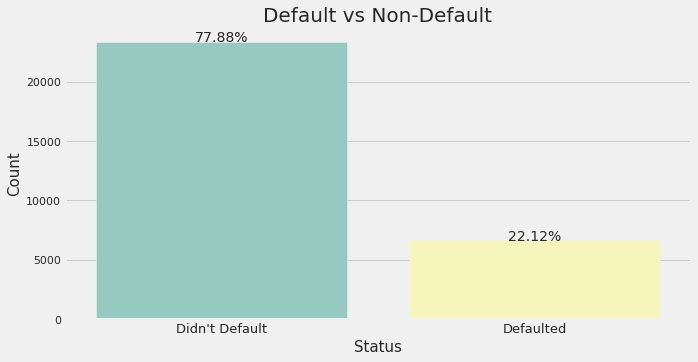

In [289]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['IsDefaulter'], palette='Set3')

ax.set_title('Default vs Non-Default',fontsize = 20)
ax.set_xlabel('Status',fontsize = 15)
ax.set_ylabel('Count',fontsize = 15)
ax.set_xticklabels(['Didn\'t Default','Defaulted'],fontsize = 13)

# adding percentage to the top of each bar
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total * 100) + '%',
            ha="center") 


As mentioned before, only 22% of people in this dataset defaulted on their credict card payment. Class imbalances such as this one can present challenges for the machine learning algorithm. Therefore, we can try to remedy this.

**We can deal with this class imbalance by just penalizing the algorithm with weights = distance for KNN and class_weight = balanced for Logistic Regression.**

**Evaluation Metric**

**For this business problem, we'll be using F1 score as the main evaluation metric. This metric is suited for datasets with class imbalance. Also, it's the harmonic mean of precision and recall.**

**Performing Train-Test Split:**

In [290]:
# performing the TTS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

**We can also apply a standard scaler to the data so that its magnitudes are normalized. This could help the learning algorithms and speed up calculations.**

In [293]:
# instantiating scaler
scaler = StandardScaler()  
scaler.fit(X_train)

# applying scaler to data
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

### 5. Data Transformation

Do you think the dataset is imbalanced? Explain Why.

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data


### 6. Data Scaling

In [279]:
# Scaling your data
# Define function to rescale training data using StandardScaler


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [280]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [282]:
# modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV, SelectKBest, f_regression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
import pickle

### ML Model - 1

K Nearest Neighbors:

In [294]:
# ML Model - 1 Implementation
# creating estimator
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')
# Fit the Algorithm

# Predict on the model

In [295]:
%%time
knn.fit(X_train, y_train)

CPU times: user 4.19 ms, sys: 1.02 ms, total: 5.2 ms
Wall time: 8.22 ms


KNeighborsClassifier(n_neighbors=6, weights='distance')

In [297]:
# creating our parameters to test
# predicting the training set
knn_y_pred_train = knn.predict(X_train)
# predicting the testing set
knn_tree_y_pred_test = knn.predict(X_test)

In [298]:
print('Untuned K Nearest Neighbors Model')
print("Training F1 Score: ", metrics.f1_score(y_train, knn_y_pred_train))
print("Testing F1 Score: ", metrics.f1_score(y_test, knn_tree_y_pred_test))

Untuned K Nearest Neighbors Model
Training F1 Score:  1.0
Testing F1 Score:  0.9856049004594181


It seems that this KNN model is way overfit and the testing metric isn't that great. Before addressing the overfitting, let's try to improve the testing metric with grid search. By optomizing the model's hyperparameters, the accuracy of predictions could improve.

In [299]:
train_base_knn = metrics.f1_score(y_train, knn_y_pred_train)
test_base_knn = metrics.f1_score(y_test, knn_tree_y_pred_test)

In [300]:
# creating dictionary to store all metrics
metric_dict = {}
metric_dict['Baseline KNN'] = {'Training F1': train_base_knn, 'Testing F1': test_base_knn}

**Grid Search**

In [301]:
# creating estimator
k_near = KNeighborsClassifier(weights='distance')

In [302]:
# creating our parameters to test
k_param_dict={'n_neighbors': range(4,15,1)}

In [303]:
# create the instance of GridSearchCV using the F1 metric for our scoring
grid_k_neighbors = GridSearchCV(k_near, k_param_dict, cv=5, scoring='f1', verbose=1)

In [304]:
%%time
# fit the grid search to our data
grid_k_neighbors.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
CPU times: user 1min 44s, sys: 6.4 s, total: 1min 51s
Wall time: 1min 35s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': range(4, 15)}, scoring='f1', verbose=1)

In [305]:
# examine the best model
# Best F1 scoree achieved across all params
print('F1 Score:', grid_k_neighbors.best_score_)

# Checking dictionary showing the best hyperparameters used to generate that score
print('Best Hyperparameters:', grid_k_neighbors.best_params_)

# Actual model object fit with those best parameters
# also shows default parameters that we did not specify
print('Model object with best parameters: ')
print(grid_k_neighbors.best_estimator_)

F1 Score: 0.9856025579117527
Best Hyperparameters: {'n_neighbors': 4}
Model object with best parameters: 
KNeighborsClassifier(n_neighbors=4, weights='distance')



**Grid search found that the 'best' KNN model has n_neighbors of 6. Let's take a look at the evaulation metrics of this model.**



In [306]:
# Predict the response for test dataset
tuned_k_neighbors_y_pred_train = grid_k_neighbors.best_estimator_.predict(X_train)

# predict the training set
tuned_k_neighbors_y_pred_test = grid_k_neighbors.best_estimator_.predict(X_test)

# Model F1, how often is the classifier correct?
print('Tuned K Nearest Neighbors Predictions')
print("F1 on train set:",metrics.f1_score(y_train, tuned_k_neighbors_y_pred_train))
print("F1 on test set:",metrics.f1_score(y_test, tuned_k_neighbors_y_pred_test))

Tuned K Nearest Neighbors Predictions
F1 on train set: 1.0
F1 on test set: 0.9871481028151776


In [307]:
train_tuned_knn = metrics.f1_score(y_train, tuned_k_neighbors_y_pred_train)
test_tuned_knn = metrics.f1_score(y_test, tuned_k_neighbors_y_pred_test)

In [308]:
metric_dict['Tuned KNN'] = {'Training F1': train_tuned_knn, 'Testing F1': test_tuned_knn}

**This tuned model has a slightly better F1 score, improving from the previous. However it's stil severely overfit. Before anything trying anything else, we should investigate other baseline models. Next, let's test out how a Logistic Regression algorithm handles predictions.**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Logistic Regression

In [309]:
# instantiate logistic regression
logreg = LogisticRegression(C=1e9, class_weight='balanced')

In [310]:
%%time
logreg.fit(X_train, y_train)

CPU times: user 150 ms, sys: 81.6 ms, total: 232 ms
Wall time: 135 ms


LogisticRegression(C=1000000000.0, class_weight='balanced')

In [311]:
# predict the training set
logreg_y_pred_train = logreg.predict(X_train)
# predict the testing set
logreg_y_pred_test = logreg.predict(X_test)

In [312]:
print('Untuned Logistic Regression Model')
print("Training F1 Score: ", metrics.f1_score(y_train, logreg_y_pred_train))
print("Testing F1 Score: ", metrics.f1_score(y_test, logreg_y_pred_test))

Untuned Logistic Regression Model
Training F1 Score:  1.0
Testing F1 Score:  1.0


In [313]:

train_base_log_reg = metrics.f1_score(y_train, logreg_y_pred_train)
test_base_log_reg = metrics.f1_score(y_test, logreg_y_pred_test)

In [314]:
metric_dict['Baseline Logistic Regression'] = {'Training F1': train_base_log_reg, 'Testing F1': test_base_log_reg}

Right off the bat, this model performed much better than the other KNN models. It's not overfit and it has a higher F1 on the testing set. To get a better sense of the model's performance, let's also look at the ROC/AUC score.

In [315]:
# getting probabilities for the target in array form
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

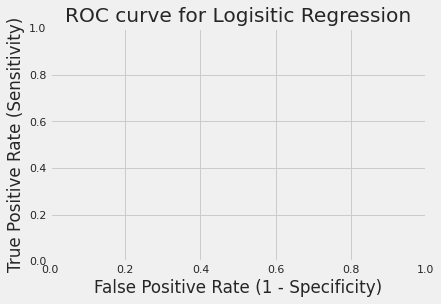

In [317]:
# ROC Curve graph
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logisitic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [318]:
# generating AUC score
print(metrics.roc_auc_score(y_test, y_pred_prob))

1.0


**Finally, we can look at the other evaluation metrics for this model and generate a confusion matrix to get a visual breakdown on how the model is predicting each model.**



In [319]:
print('accuracy:', metrics.accuracy_score(y_test, logreg_y_pred_test))
print('precision:', metrics.precision_score(y_test, logreg_y_pred_test))
print('recall:', metrics.recall_score(y_test, logreg_y_pred_test))
print('f1 score:', metrics.f1_score(y_test, logreg_y_pred_test))

accuracy: 1.0
precision: 1.0
recall: 1.0
f1 score: 1.0


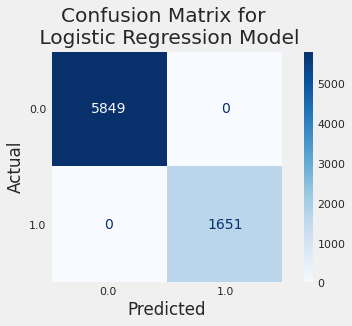

In [320]:
# confusion matrix
log_reg_conf_matrix = plot_confusion_matrix(logreg, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues)
log_reg_conf_matrix.ax_.set_title('Confusion Matrix for \n Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)

With this confusion matrix, we can see that the model predicts the 'Non-Default' label pretty well! However, it's not as strong with predicting 'Default'. Let's normalize this confusion matrix too.

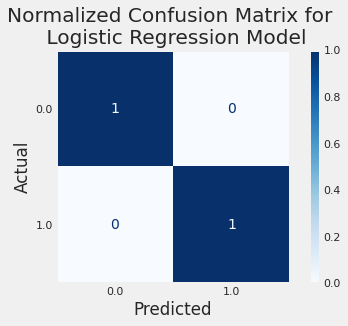

In [321]:
normalized_log_reg_conf_matrix = plot_confusion_matrix(logreg, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
normalized_log_reg_conf_matrix.ax_.set_title('Normalized Confusion Matrix for \n Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)

**As mentioned, the Recall (TRP) of this model isn't the best. We can try improving this model from here.**

**Grid Search**

**Logistic Regression models don't have many hyperparameters to tune, but it's worth a shot to see if we can improve the evaluation metrics a bit.**

In [322]:
# creating our estimator
tuned_log = LogisticRegression(random_state=6, class_weight='balanced')

In [323]:
# creating our parameters to test
log_param_dict={'C': range(3,7,1),
                'penalty': ['l1','l2']}

In [324]:
grid_log = GridSearchCV(tuned_log, log_param_dict, cv=5, scoring='f1', verbose=1)

In [325]:
%%time
grid_log.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: user 2.56 s, sys: 1.7 s, total: 4.26 s
Wall time: 2.25 s


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=6),
             param_grid={'C': range(3, 7), 'penalty': ['l1', 'l2']},
             scoring='f1', verbose=1)

In [326]:
# examine the best model
print('F1 Score:', grid_log.best_score_)
print('Best Hyperparameters:', grid_log.best_params_)
print('Model object with best parameters: ')
print(grid_log.best_estimator_)

F1 Score: 1.0
Best Hyperparameters: {'C': 3, 'penalty': 'l2'}
Model object with best parameters: 
LogisticRegression(C=3, class_weight='balanced', random_state=6)


In [327]:
# predict the testing dataset
grid_log_y_pred_train = grid_log.best_estimator_.predict(X_train)

# predict the training set
grid_log_y_pred_test = grid_log.best_estimator_.predict(X_test)

print('Tuned Logistic Regression Model Predictions')
print("F1 on train set:",metrics.f1_score(y_train, grid_log_y_pred_train))
print("F1 on test set:",metrics.f1_score(y_test, grid_log_y_pred_test))

Tuned Logistic Regression Model Predictions
F1 on train set: 1.0
F1 on test set: 1.0


This model actually generated the same exact evaluation metrics as the baseline Logistic Regression model. As I mentioned before, this is probably because Logistic Regression models don't have many hyperparameters to tune. Therefore, there wasn't much difference between the baseline and tuned models.

Lastly, let's try out a Decision Tree model to see if the F1 score improves at all.

In [328]:
train_tuned_log_reg = metrics.f1_score(y_train, grid_log_y_pred_train)
test_tuned_log_reg = metrics.f1_score(y_test, grid_log_y_pred_test)

In [329]:
metric_dict['Tuned Logistic Regression'] = {'Training F1': train_tuned_log_reg, 'Testing F1': test_tuned_log_reg}

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

**Model 3: Decision Tree**

In [330]:
# ML Model - 3 Implementation
# baseline decision tree
tree = DecisionTreeClassifier()
# Fit the Algorithm

# Predict on the model

In [331]:
%%time
tree.fit(X_train, y_train)

CPU times: user 43.6 ms, sys: 952 µs, total: 44.5 ms
Wall time: 49 ms


DecisionTreeClassifier()

In [332]:
%%time
tree.fit(X_train, y_train)

CPU times: user 44.1 ms, sys: 0 ns, total: 44.1 ms
Wall time: 43.2 ms


DecisionTreeClassifier()

In [333]:
# predict the training set
tree_y_pred_train = tree.predict(X_train)
# predict the testing set
tree_y_pred_test = tree.predict(X_test)

In [334]:
print('Untuned Decision Tree Model')
print("Training F1 Score: ", metrics.f1_score(y_train, tree_y_pred_train))
print("Testing F1 Score: ", metrics.f1_score(y_test, tree_y_pred_test))

Untuned Decision Tree Model
Training F1 Score:  1.0
Testing F1 Score:  1.0


In [335]:
train_base_tree = metrics.f1_score(y_train, tree_y_pred_train)
test_base_tree = metrics.f1_score(y_test, tree_y_pred_test)

In [336]:
metric_dict['Baseline Decision Tree'] = {'Training F1': train_base_tree, 'Testing F1': test_base_tree}

**Grid Search**

In [337]:
# creating our estimator
decision_tree = DecisionTreeClassifier(random_state=3, criterion='gini')

In [338]:
# creating our parameters to test
param_dict={'max_depth': range(2,15,1), 
            'max_leaf_nodes': range(2,30,2),
            'min_samples_split': range(2,4,1)}

In [339]:
# create the instance of GridSearchCV using the F1 metric for our scoring. 
grid_tree = GridSearchCV(decision_tree, param_dict, cv=5, scoring='f1', verbose=1)

In [340]:
%%time
# fit the grid search to our data
grid_tree.fit(X_train, y_train)

Fitting 5 folds for each of 364 candidates, totalling 1820 fits
CPU times: user 1min 13s, sys: 233 ms, total: 1min 14s
Wall time: 1min 14s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=3),
             param_grid={'max_depth': range(2, 15),
                         'max_leaf_nodes': range(2, 30, 2),
                         'min_samples_split': range(2, 4)},
             scoring='f1', verbose=1)

In [341]:
# examine the best model
# Best F1 scoree achieved across all params
print('F1 Score:', grid_tree.best_score_)
# Checking dictionary showing the best hyperparameters used to generate that score
print('Best Hyperparameters:', grid_tree.best_params_)
# Actual model object fit with those best parameters
# also shows default parameters that we did not specify
print('Model object with best parameters: ')
print(grid_tree.best_estimator_)

F1 Score: 1.0
Best Hyperparameters: {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_split': 2}
Model object with best parameters: 
DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2, random_state=3)


In [342]:
# predict the testing set
tuned_tree_y_pred_train = grid_tree.best_estimator_.predict(X_train)

# predict the training set
tuned_tree_y_pred_test = grid_tree.best_estimator_.predict(X_test)

# Model F1, how often is the classifier correct?
print('Tuned Decision Tree Model Predictions')
print("F1 on train set:",metrics.f1_score(y_train, tuned_tree_y_pred_train))
print("F1 on test set:",metrics.f1_score(y_test, tuned_tree_y_pred_test))

Tuned Decision Tree Model Predictions
F1 on train set: 1.0
F1 on test set: 1.0


Unfortunately, the baseline Decision Tree model performed much worse than the other model iterations. It's also severely overfit. Let's see if we can improve this with grid search.

It's important to note that baseline models for tree-based algorithms will always be overfit like this because we never told it when to "stop." This can be solved with the hyperparamter max_leaf_nodes.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***